In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import PIL
import os

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [7]:
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [8]:
data_dir

'.\\datasets\\flower_photos'

In [9]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [11]:
roses = list(data_dir.glob('roses/*'))
roses[0:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

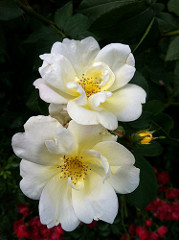

In [12]:
PIL.Image.open(str(roses[0]))

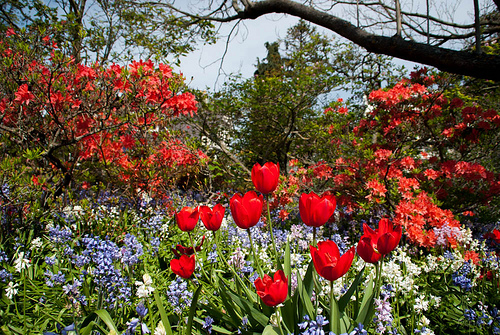

In [13]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

In [15]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflower/*')),
    'tulips':list(data_dir.glob('tulips/*')),

}

In [16]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,

}

In [17]:
flowers_images_dict['roses'][0] # here the path is in windows so open cv cant able to read it  so wrap it within str so it can read

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

NOW WE ARE GOING TO USE CV2 MODULE TO READ THIS IMAGE INTO A OPEN CV OBJECT

if u supply the path with in the imread it will suppy a numpy array

In [18]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))   # open cv just read the image from the disk and converted into a 3D array
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [19]:
img.shape

(240, 179, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
X = []
y = []

for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [22]:
X=np.array(X)
y=np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [24]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [25]:
X_train_scaled

array([[[[0.87058824, 0.90588235, 0.95686275],
         [0.87058824, 0.90588235, 0.96078431],
         [0.87843137, 0.91372549, 0.96470588],
         ...,
         [0.65490196, 0.74901961, 0.81960784],
         [0.6       , 0.70588235, 0.76862745],
         [0.55686275, 0.67058824, 0.72941176]],

        [[0.8745098 , 0.90980392, 0.96078431],
         [0.87058824, 0.90588235, 0.95686275],
         [0.86666667, 0.90196078, 0.95294118],
         ...,
         [0.63529412, 0.72941176, 0.8       ],
         [0.59215686, 0.69411765, 0.76078431],
         [0.56470588, 0.6745098 , 0.7372549 ]],

        [[0.87843137, 0.91372549, 0.96470588],
         [0.8745098 , 0.90980392, 0.96078431],
         [0.87058824, 0.90588235, 0.95686275],
         ...,
         [0.61568627, 0.70980392, 0.77647059],
         [0.58431373, 0.68235294, 0.75294118],
         [0.57647059, 0.67843137, 0.74509804]],

        ...,

        [[0.89411765, 0.91764706, 0.9372549 ],
         [0.89803922, 0.9254902 , 0.94509804]

In [26]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
              )
model.fit(X_train_scaled,y_train,epochs=30)



Epoch 1/30


70/70 [==============================] - 10s 133ms/step - loss: 1.1603 - accuracy: 0.4776
Epoch 2/30
70/70 [==============================] - 11s 153ms/step - loss: 0.9348 - accuracy: 0.6162
Epoch 3/30
70/70 [==============================] - 10s 149ms/step - loss: 0.8095 - accuracy: 0.6701
Epoch 4/30
70/70 [==============================] - 9s 132ms/step - loss: 0.6252 - accuracy: 0.7545
Epoch 5/30
70/70 [==============================] - 9s 128ms/step - loss: 0.4625 - accuracy: 0.8191
Epoch 6/30
70/70 [==============================] - 9s 125ms/step - loss: 0.3422 - accuracy: 0.8748
Epoch 7/30
70/70 [==============================] - 9s 126ms/step - loss: 0.2273 - accuracy: 0.9313
Epoch 8/30
70/70 [==============================] - 9s 125ms/step - loss: 0.1577 - accuracy: 0.9439
Epoch 9/30
70/70 [==============================] - 9s 126ms/step - loss: 0.0706 - accuracy: 0.9785
Epoch 10/30
70/70 [==============================] - 9s 125ms/step - loss: 0.0271 - accuracy:

In [27]:
model.evaluate(X_test_scaled,y_test)      

24/24 [==============================] - 1s 31ms/step - loss: 2.9390 - accuracy: 0.6555


[2.9389588832855225, 0.6554508805274963]

WHILE TRAINING WE GOT 100% ACCURACY BUT WHEN TESTING WE GOT ONLY 63% THIS SCENARIO IS CALLED OVERFITTING

In [28]:
prediction = model.predict(X_test_scaled)
prediction

24/24 [==============================] - 1s 30ms/step


array([[  2.9291515 ,   3.6745274 ,   6.612089  , -27.43406   ,
          2.163209  ],
       [ 14.069572  ,   5.057045  ,   7.8367724 , -36.37512   ,
         -6.841045  ],
       [ 16.01944   ,  -5.3110814 ,  -6.959733  , -35.558594  ,
         21.64007   ],
       ...,
       [ -2.4242668 ,  -0.10806693,  11.922834  , -27.894096  ,
          2.1392698 ],
       [ -1.909954  ,  21.099115  ,  -1.9972576 , -48.601627  ,
         14.064153  ],
       [ 12.798748  ,  -1.9167558 ,  -3.9708798 , -43.558537  ,
         25.348822  ]], dtype=float32)

In [29]:
score = tf.nn.softmax(prediction[0])            #this will convert a numpy array into a probability score
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.30759494e-02, 4.86264080e-02, 9.17569757e-01, 1.50170259e-15,
       1.07279075e-02], dtype=float32)>

In [30]:
np.argmax(score)

2

In [31]:
y_test[0]

2

SEE WE GOT SAME VALUES BUT STILL WE GOT ONLY 63% ACCURACY THIS IS DUE TO OVERFITTING WE CAN OVER COME THIS BY DATA AUGMENTATION

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),                                                      
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

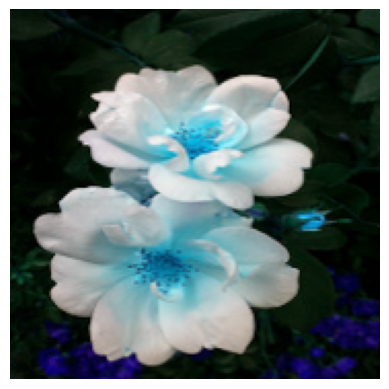

In [33]:
plt.axis('off')
plt.imshow(X[0])

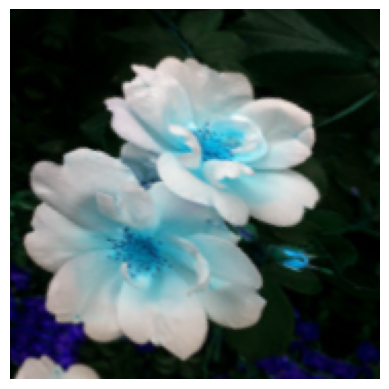

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [38]:
num_classes = 5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
              )
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
70/70 [==============================] - 12s 164ms/step - loss: 1.1473 - accuracy: 0.4933
Epoch 2/30
70/70 [==============================] - 12s 172ms/step - loss: 0.9358 - accuracy: 0.6198
Epoch 3/30
70/70 [==============================] - 13s 183ms/step - loss: 0.8477 - accuracy: 0.6607
Epoch 4/30
70/70 [==============================] - 13s 179ms/step - loss: 0.8168 - accuracy: 0.6589
Epoch 5/30
70/70 [==============================] - 13s 181ms/step - loss: 0.7632 - accuracy: 0.6952
Epoch 6/30
70/70 [==============================] - 13s 182ms/step - loss: 0.7274 - accuracy: 0.7118
Epoch 7/30
70/70 [==============================] - 13s 180ms/step - loss: 0.6823 - accuracy: 0.7163
Epoch 8/30
70/70 [==============================] - 12s 172ms/step - loss: 0.6717 - accuracy: 0.7392
Epoch 9/30
70/70 [==============================] - 12s 167ms/step - loss: 0.6475 - accuracy: 0.7397
Epoch 10/30
70/70 [==============================] - 11s 160ms/step - loss: 0.6295 - accura

In [39]:
model.evaluate(X_test_scaled,y_test)

24/24 [==============================] - 1s 32ms/step - loss: 0.9629 - accuracy: 0.7416


[0.962887167930603, 0.7415881752967834]

THIS IS THE POWER OF DATA AUGMENTATION WE IMPROVED FROM 65% TO 74%